## Convolutional Neural Network on 2D images, step by step increase of computer vision
Tensorflow and Keras are used for modeling.

### Process:
•	First the images are fed and image content is reduced to look at enhanced features for specific details. The convolution layers are added prior to dense filters.
•	Size of convolution is a 3x3 grid. Convolution is followed by maxpooling layer effectively reducing image by 25%
•	Training is done on highlighted features obtained after convolution.
•	The first layer the shape of input data is fed


In [3]:
#import tensorflow
import tensorflow as tf

#load fashion mnist data set, the data set has train and test
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) =mnist.load_data()

# convert 28x28 pixel square images with 1byte gray scale into 4d Tensor, there are 60,000 training images
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

# normalize images to be between 0 and 1
training_images = training_images/255.0
test_images = test_images/255.0

# Define Neural Net model, Sequential: That defines a SEQUENCE of layers in the neural network
model = tf.keras.models.Sequential([
# Number of Convolutions =64. each input image will have 64 convoluted images. The size of the Convolution filter is a 3x3 grid 
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
#Pooling creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1 across all images
    tf.keras.layers.MaxPooling2D(2,2),
# Convolution one more time    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
# Flattens to 1 dimensional set from square    
    tf.keras.layers.Flatten(),
    
# Dense: adds a Layer with 128 neurons, at each layer activation function with relu tells to drop negative numbers and only pass non-negative numbers to next layer   
    tf.keras.layers.Dense(128, activation='relu'),
# Output layer with 10 features where Softmax takes a set of values, and effectively picks the biggest one,  
    tf.keras.layers.Dense(10, activation='softmax')
])

#build the model
model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()
#train the model for number of epochs or iterations
model.fit(training_images, training_labels, epochs=5)

#test with unseen data
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [4]:
## Visualizing Convolutions and pooling, print first 100 labels of test set
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


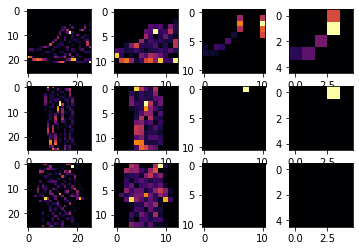

In [9]:
import matplotlib.pyplot as plt
# define subplot in matplot where f below is Figure and axarr defines subplots(3,4) means three rows and 4 columns of images, axarr stands for axes arraryf, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=2
THIRD_IMAGE=33
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  #axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)